# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

### Objective:

#### This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

### Dataset:

#### Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.

## Tasks:

### 1. Data Exploration and Preprocessing:

##### •	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).why.


##### •	Handle missing values as per the best practices (imputation, removal, etc.).

##### •	Apply scaling techniques to numerical features:

##### •	Standard Scaling

##### •	Min-Max Scaling

##### •	Discuss the scenarios where each scaling technique is preferred and why.

In [1]:
# Importing the Pandas library for data manipulation and analysis
import pandas as pd

# Importing the NumPy library for numerical operations and handling arrays
import numpy as np

# Importing the Matplotlib library for creating visualizations
import matplotlib.pyplot as plt

# Importing the Seaborn library for creating more advanced and visually appealing statistical plots
import seaborn as sns

In [2]:
# Reading a CSV file named "adult_with_headers.csv" into a Pandas DataFrame
# The 'na_values' parameter specifies that any " ?" in the data should be treated as a missing value (NaN)
# The 'encoding' parameter ensures the file is read using UTF-8 encoding
adults = pd.read_csv("adult_with_headers.csv", na_values=[" ?"], encoding="utf-8")

# Displaying the first few rows of the DataFrame to inspect the data
adults

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Replacing all occurrences of the string "?" in the DataFrame with NaN (Not a Number) to handle missing values
# The 'inplace=True' parameter ensures that the changes are made directly to the existing DataFrame without needing to create a new one
adults.replace("?", np.nan, inplace=True)

In [4]:
# Displaying the data types of each column in the DataFrame to understand what type of data each column contains
adults.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [5]:
# Generating summary statistics for numerical columns in the DataFrame
# This includes metrics like count, mean, standard deviation, min, max, and the 25th, 50th, and 75th percentiles
adults.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Checking for missing values in each column of the DataFrame
# The 'isnull()' function identifies missing values, and 'sum()' counts the total number of missing values per column
adults.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [7]:
# Displaying the data types of each column in the DataFrame to understand the type of data stored in each column
adults.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [8]:
# Defining a list of categorical columns in the DataFrame that contain non-numeric data
cat_cols = ["education", "marital_status", "occupation", "relationship", "race", "sex", "native_country", "income"]

# Defining a list of numerical columns in the DataFrame that contain numeric data
num_cols = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

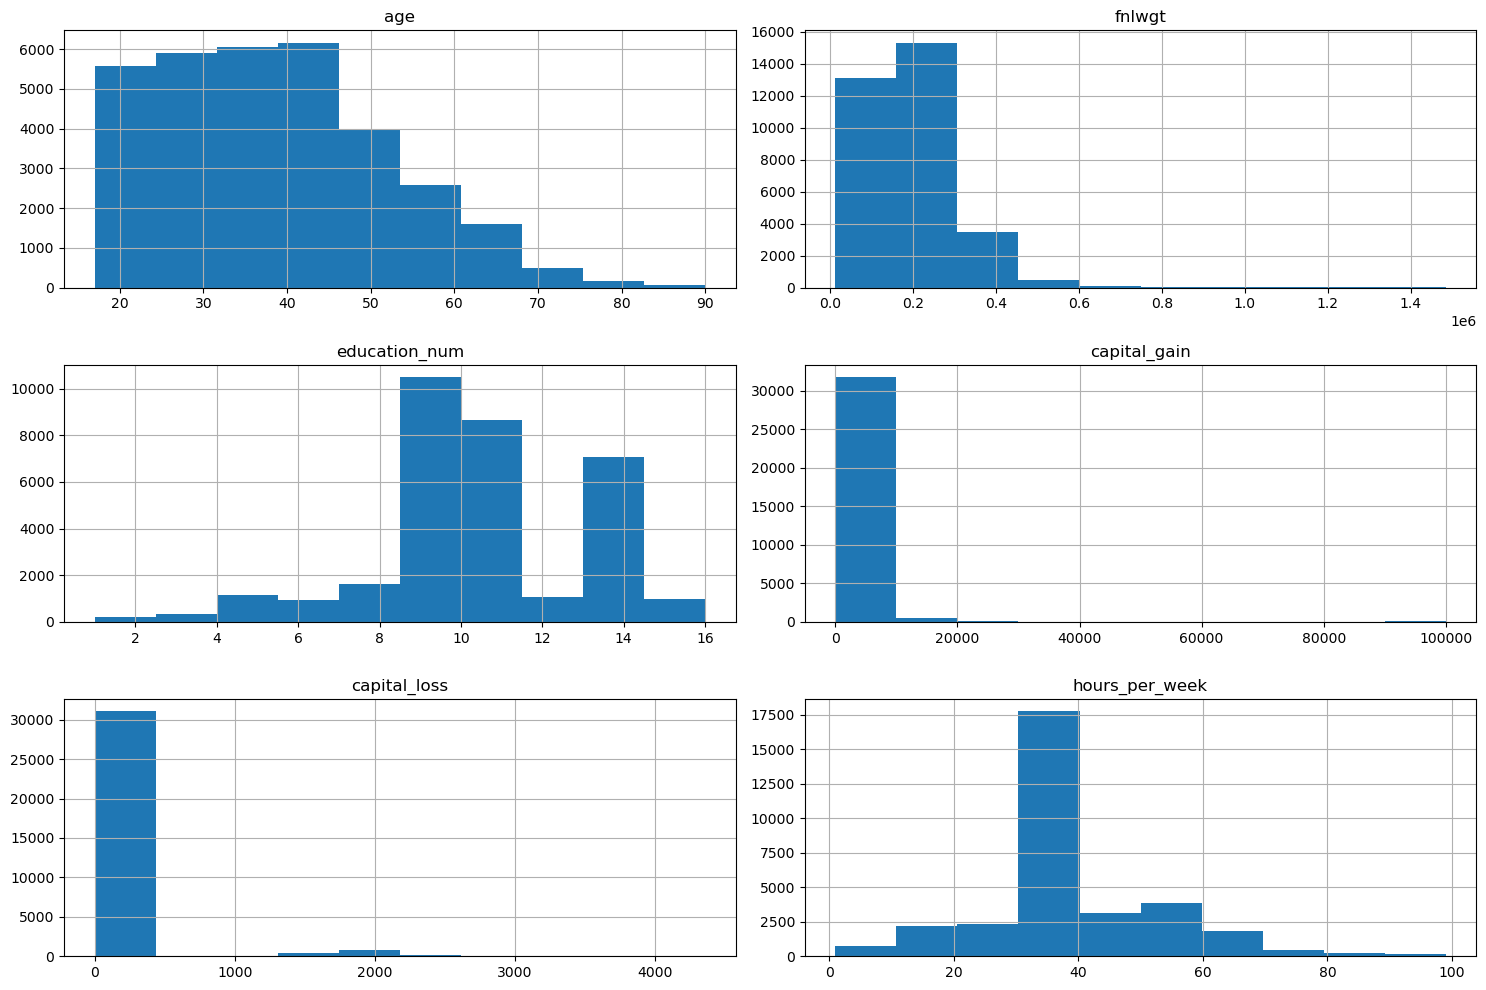

In [9]:
# Assuming 'adults' is a DataFrame or similar structure with numeric columns
adults.hist(figsize=(15, 10))

# Adjust layout to prevent overlapping and clipping
plt.tight_layout()

# Show the plot
plt.show()

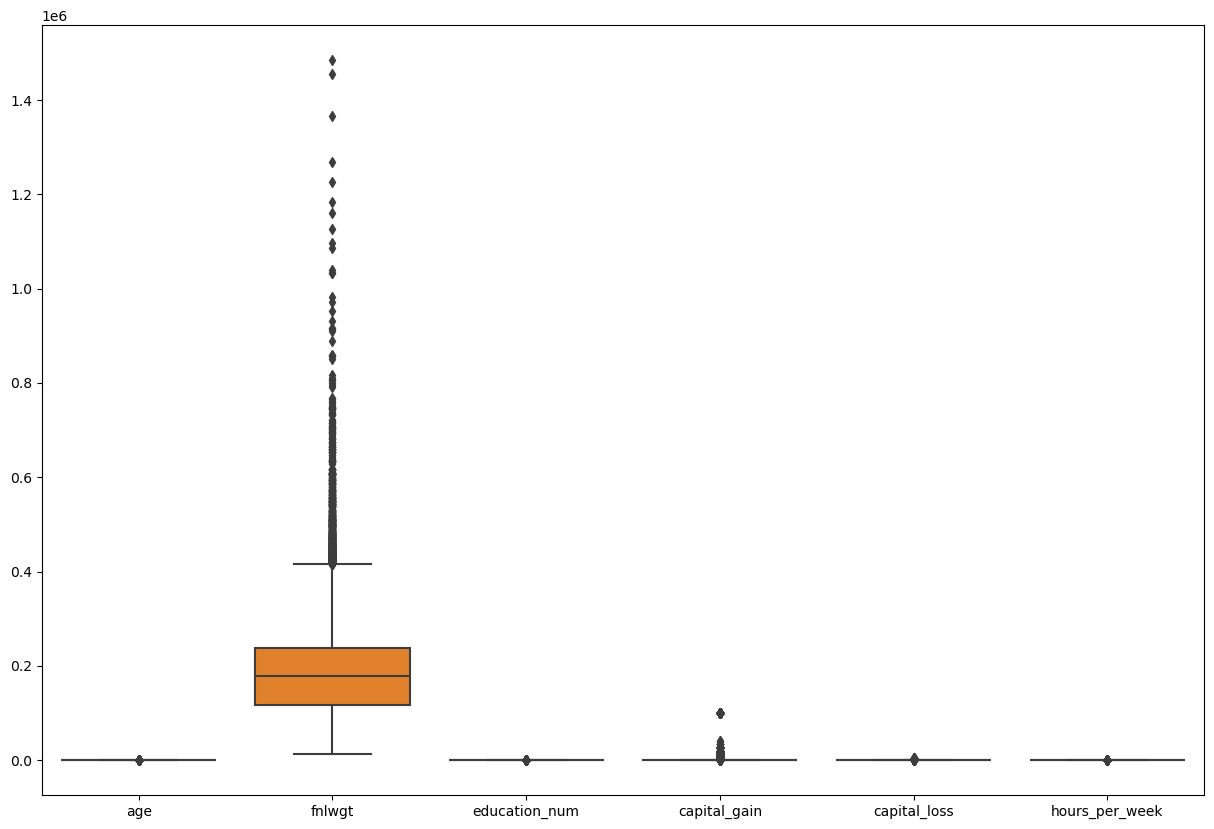

In [10]:
# Create a new figure with a specified size (width=15, height=10)
plt.figure(figsize=(15, 10))

# Create a boxplot for the DataFrame 'adults' using seaborn
# Each column in 'adults' will be represented as a separate boxplot
sns.boxplot(data=adults)

# Display the boxplot on the screen
plt.show()

In [11]:
# Drop the 'workclass' column from the 'adults' DataFrame to create the feature set X
# axis=1 specifies that a column (not a row) is being dropped
X = adults.drop(["workclass"], axis=1)

# Extract the 'workclass' column from the 'adults' DataFrame to create the target variable y
# This column will be used as the dependent variable in a supervised learning model
y = adults["workclass"]

In [12]:
# Display the contents of the DataFrame 'X'
# This will show the feature set after dropping the 'workclass' column from the original DataFrame
X

,age,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
# Display the contents of the Series 'y'
# This will show the target variable 'workclass' that was extracted from the original DataFrame
y

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name: workclass, Length: 32561, dtype: object

In [14]:
# Calculate and display the counts of unique values in the Series 'y'
# This shows the distribution of each category within the 'workclass' column
y.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [15]:
# Calculate and display the counts of unique values in the 'occupation' column of the 'adults' DataFrame
# This shows the distribution of each occupation category within the dataset
adults.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [16]:
# Import the StandardScaler class from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler to the numerical columns in the feature set 'X'
# This calculates the mean and standard deviation of the numerical columns
scaler = scaler.fit(X[num_cols])

# Transform the numerical columns in 'X' by standardizing them (mean=0, variance=1)
# Create a new DataFrame with the standardized values and use the original column names
std_num_cols = pd.DataFrame(scaler.transform(X[num_cols]), columns=X[num_cols].columns)

In [17]:
# Display the contents of the DataFrame 'std_num_cols'
# This will show the standardized numerical columns after applying StandardScaler
std_num_cols

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [18]:
# Import the MinMaxScaler class from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit the MinMaxScaler to the numerical columns in the feature set 'X'
# This calculates the minimum and maximum values for each numerical column
min_max_scaler = min_max_scaler.fit(X[num_cols])

# Transform the numerical columns in 'X' by applying Min-Max scaling
# This scales the values to a range between 0 and 1
# Create a new DataFrame with the scaled values and use the original column names
min_max_scaled_std = pd.DataFrame(min_max_scaler.transform(X[num_cols]), columns=X[num_cols].columns)

# Display the contents of the DataFrame 'min_max_scaled_std'
# This will show the numerically scaled columns after applying Min-Max scaling
min_max_scaled_std

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


## Scenarios for Using Each Scaling Technique
### Standard Scaling (Z-score Normalization):

#### When to Use:
##### Preferred when the data follows a normal (Gaussian) distribution or when you expect the data to be normally distributed after transformation.
##### Useful in algorithms that assume data is normally distributed, such as linear regression, logistic regression, and many machine learning algorithms that use distance metrics like K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Principal Component Analysis (PCA).
#### Why:
##### Standard Scaling ensures that all features contribute equally to the model's learning process by giving them a similar scale with a mean of 0 and a standard deviation of 1. It prevents features with large values from dominating the learning process.

### Min-Max Scaling:

#### When to Use:
##### Preferred when you want to preserve the relationships between the original data points and scale the features to a bounded range, such as [0, 1].
##### Commonly used in algorithms that do not assume any particular distribution of data, such as neural networks and gradient-based optimization methods (e.g., in deep learning).
##### Ideal for cases where you want to maintain interpretability, as the transformed values retain their original relationships.
#### Why:
##### Min-Max Scaling is especially useful when the data has outliers, and you want to compress the values within a specific range without being overly influenced by extreme values.

#### Summary
##### Standard Scaling is best for data that is normally distributed or when using algorithms sensitive to the magnitude of the data.
##### Min-Max Scaling is ideal when you need to scale data to a specific range or when the data has outliers that should not dominate the learning process.

### 2. Encoding Techniques:g.


#### •	Apply One-Hot Encoding to categorical variables with less than 5 categories.
#### •	Use Label Encoding for categorical variables with more than 5 categories.
#### •	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

In [19]:
# Iterate over each column in the list of categorical columns 'cat_cols'
for col in X[cat_cols]:
    # Print the name of the current column
    print(col)
    
    # Print the number of unique values in the current column
    # X[col].value_counts() returns the frequency count of unique values, 
    # and len() gives the number of unique values
    print(len(X[col].value_counts()))

education
16
marital_status
7
occupation
14
relationship
6
race
5
sex
2
native_country
41
income
2


In [20]:
# Initialize two lists to store column names based on the number of unique values
small_cat_cols = []
large_cat_cols = []

# Iterate over each column in the list of categorical columns 'cat_cols'
for col in X[cat_cols]:
    # Check if the number of unique values in the column is less than or equal to 5
    if len(X[col].value_counts()) <= 5:
        # If true, add the column name to the 'small_cat_cols' list
        small_cat_cols.append(col)
    else:
        # If false, add the column name to the 'large_cat_cols' list
        large_cat_cols.append(col)

# Print the list of categorical columns with 5 or fewer unique values
print("Small Categorical Columns")
print(small_cat_cols)

# Print the list of categorical columns with more than 5 unique values
print("Large Categorical Columns")
print(large_cat_cols)

Small Categorical Columns
['race', 'sex', 'income']
Large Categorical Columns
['education', 'marital_status', 'occupation', 'relationship', 'native_country']


### One Hot Encoding for small categorical columns

In [21]:
# Perform one-hot encoding on the columns specified in 'small_cat_cols'
# drop_first=True is used to avoid multicollinearity by dropping the first category of each variable
# Convert the resulting DataFrame to integers
one_hot_data = pd.get_dummies(X[small_cat_cols], drop_first=True).astype("int")

# Print a message indicating that one-hot encoding has been applied
print("\nData after One Hot Encoding:")

# Display the DataFrame 'one_hot_data' which contains the one-hot encoded columns
one_hot_data


Data after One Hot Encoding:


,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,0,0,0,1,1,0
1,0,0,0,1,1,0
2,0,0,0,1,1,0
3,0,1,0,0,1,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
32556,0,0,0,1,0,0
32557,0,0,0,1,1,1
32558,0,0,0,1,0,0
32559,0,0,0,1,1,0


### Label Encoding for large categorical columns

In [22]:
# Import the LabelEncoder class from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Import warnings library to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Select the columns in 'large_cat_cols' from the DataFrame 'X' for label encoding
columns_to_encode = X[large_cat_cols]

# Apply Label Encoding to each column in 'columns_to_encode'
for column in columns_to_encode:
    # Create a new column with '_LabelEncoded' suffix to store the label encoded values
    columns_to_encode[column + '_LabelEncoded'] = label_encoder.fit_transform(columns_to_encode[column])

# Print a message indicating that label encoding has been applied
print("\nData after Label Encoding:")

# Display the DataFrame 'columns_to_encode' which contains the label encoded columns
columns_to_encode


Data after Label Encoding:


,education,marital_status,occupation,relationship,native_country,education_LabelEncoded,marital_status_LabelEncoded,occupation_LabelEncoded,relationship_LabelEncoded,native_country_LabelEncoded
0,Bachelors,Never-married,Adm-clerical,Not-in-family,United-States,9,4,0,1,38
1,Bachelors,Married-civ-spouse,Exec-managerial,Husband,United-States,9,2,3,0,38
2,HS-grad,Divorced,Handlers-cleaners,Not-in-family,United-States,11,0,5,1,38
3,11th,Married-civ-spouse,Handlers-cleaners,Husband,United-States,1,2,5,0,38
4,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Cuba,9,2,9,5,4
...,...,...,...,...,...,...,...,...,...,...
32556,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,United-States,7,2,12,5,38
32557,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,United-States,11,2,6,0,38
32558,HS-grad,Widowed,Adm-clerical,Unmarried,United-States,11,6,0,4,38
32559,HS-grad,Never-married,Adm-clerical,Own-child,United-States,11,4,0,3,38


In [23]:
# Drop the specified columns from the DataFrame 'columns_to_encode'
# This removes the original categorical columns, leaving only the label encoded columns
label_encoded_data = columns_to_encode.drop(["education", "marital_status", "occupation", "relationship", "native_country"], axis=1)

# Display the DataFrame 'label_encoded_data' which contains only the label encoded columns
label_encoded_data

,education_LabelEncoded,marital_status_LabelEncoded,occupation_LabelEncoded,relationship_LabelEncoded,native_country_LabelEncoded
0,9,4,0,1,38
1,9,2,3,0,38
2,11,0,5,1,38
3,1,2,5,0,38
4,9,2,9,5,4
...,...,...,...,...,...
32556,7,2,12,5,38
32557,11,2,6,0,38
32558,11,6,0,4,38
32559,11,4,0,3,38


In [24]:
# Concatenate the one-hot encoded DataFrame 'one_hot_data' with the label encoded DataFrame 'label_encoded_data'
# The concatenation is done along the columns (axis=1) to combine the data side by side
X_cat_cols_data = pd.concat([one_hot_data, label_encoded_data], axis=1)

# Display the resulting DataFrame 'X_cat_cols_data' which combines one-hot and label encoded data
X_cat_cols_data

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,education_LabelEncoded,marital_status_LabelEncoded,occupation_LabelEncoded,relationship_LabelEncoded,native_country_LabelEncoded
0,0,0,0,1,1,0,9,4,0,1,38
1,0,0,0,1,1,0,9,2,3,0,38
2,0,0,0,1,1,0,11,0,5,1,38
3,0,1,0,0,1,0,1,2,5,0,38
4,0,1,0,0,0,0,9,2,9,5,4
...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,7,2,12,5,38
32557,0,0,0,1,1,1,11,2,6,0,38
32558,0,0,0,1,0,0,11,6,0,4,38
32559,0,0,0,1,1,0,11,4,0,3,38


In [25]:
# Check for missing values in the DataFrame 'X_cat_cols_data'
# isnull() returns a DataFrame of the same shape with boolean values indicating the presence of missing values
# sum() aggregates the count of missing values for each column
X_cat_cols_data.isnull().sum()

race_ Asian-Pac-Islander       0
race_ Black                    0
race_ Other                    0
race_ White                    0
sex_ Male                      0
income_ >50K                   0
education_LabelEncoded         0
marital_status_LabelEncoded    0
occupation_LabelEncoded        0
relationship_LabelEncoded      0
native_country_LabelEncoded    0
dtype: int64

In [26]:
# Concatenate the DataFrame 'X_cat_cols_data' with the standardized numerical columns 'std_num_cols'
# The concatenation is done along the columns (axis=1) to combine categorical and numerical features
final_X = pd.concat([X_cat_cols_data, std_num_cols], axis=1)

# Display the resulting DataFrame 'final_X' which combines all categorical and numerical features
final_X

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,education_LabelEncoded,marital_status_LabelEncoded,occupation_LabelEncoded,relationship_LabelEncoded,native_country_LabelEncoded,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0,0,0,1,1,0,9,4,0,1,38,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0,0,0,1,1,0,9,2,3,0,38,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,0,0,0,1,1,0,11,0,5,1,38,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,0,1,0,0,1,0,1,2,5,0,38,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,0,1,0,0,0,0,9,2,9,5,4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,7,2,12,5,38,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0,0,0,1,1,1,11,2,6,0,38,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,0,0,0,1,0,0,11,6,0,4,38,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,0,0,0,1,1,0,11,4,0,3,38,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


### Pros and Cons of One-Hot Encoding and Label Encoding

### One-Hot Encoding

### Pros:

#### No Ordinal Relationships Assumed:

##### One-Hot Encoding does not assume any order among the categories. This is ideal for nominal categorical variables where categories have no intrinsic ranking (e.g., color, type of product).

#### Prevents Misinterpretation by Models:

##### Since each category is represented by a separate column, it prevents algorithms from interpreting the encoded values as ordinal or having any meaningful distance between them.

#### Widely Supported:

##### Many machine learning algorithms and libraries readily support datasets with one-hot encoded variables.

### Cons:

#### High Dimensionality:

##### If the categorical variable has many unique values, One-Hot Encoding can result in a large number of new columns, increasing the dimensionality of the dataset and potentially leading to the "curse of dimensionality."

#### Sparsity:

##### The resulting matrix from One-Hot Encoding is sparse, meaning it contains a lot of zeros. This can be inefficient in terms of memory usage and computation.

#### Potential Overfitting:

##### The increase in dimensionality can also lead to overfitting, especially if the model is complex relative to the amount of data available.

### Label Encoding

### Pros:

#### Simple and Efficient:

##### Label Encoding is straightforward to implement and results in a single integer column, which is computationally efficient and easy to manage.

#### No Increase in Dimensionality:

##### Unlike One-Hot Encoding, Label Encoding doesn’t increase the number of columns in the dataset, which keeps the data compact.

#### Useful for Ordinal Data:

##### Label Encoding is suitable for ordinal categorical variables where the categories have a meaningful order (e.g., low, medium, high).

### Cons:

#### Assumes Ordinal Relationships:

##### Label Encoding imposes an ordinal relationship between categories, which can be problematic if the categories are nominal (e.g., using 0, 1, 2 to represent "cat", "dog", "mouse" could imply an incorrect ranking).

#### Misinterpretation by Models:

##### Many machine learning algorithms (like linear models or distance-based models) may interpret the numerical values as having some sort of rank or distance, leading to incorrect conclusions.

#### Not Suitable for High Cardinality:

##### For variables with many categories, Label Encoding can lead to issues where the model might assign undue importance to certain categories simply based on their numerical labels.

### When to Use Each Encoding

#### One-Hot Encoding:

##### Best suited for nominal categorical variables with no ordinal relationship. It’s often used when the number of unique categories is manageable, and you want to avoid any assumption of order among categories.

#### Label Encoding:

##### Ideal for ordinal categorical variables where the categories have a meaningful order. It’s also useful when you have a categorical variable with a large number of categories and you need a simple, compact representation.

### Conclusion
#### Both One-Hot Encoding and Label Encoding have their advantages and disadvantages, and the choice between them depends on the nature of the data and the specific requirements of the machine learning model. Understanding the data's structure and the algorithm’s sensitivity to the encoding method is crucial in making the right choice.

### 3. Feature Engineering:.


#### •	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
#### •	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

### income_per_hour: This feature can be calculated by dividing capital_gain by hours_per_week. It provides a measure of earning potential per hour worked.

In [27]:
# Create a new column 'income_per_hour' in the DataFrame 'final_X'
# This column is calculated by dividing 'capital_gain' by 'hours_per_week'
final_X['income_per_hour'] = final_X['capital_gain'] / final_X['hours_per_week']

# Display the updated DataFrame 'final_X' which now includes the new 'income_per_hour' feature
final_X

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,education_LabelEncoded,marital_status_LabelEncoded,occupation_LabelEncoded,relationship_LabelEncoded,native_country_LabelEncoded,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_per_hour
0,0,0,0,1,1,0,9,4,0,1,38,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-4.190099
1,0,0,0,1,1,0,9,2,3,0,38,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0.065666
2,0,0,0,1,1,0,11,0,5,1,38,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4.118622
3,0,1,0,0,1,0,1,2,5,0,38,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4.118622
4,0,1,0,0,0,0,9,2,9,5,4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4.118622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,7,2,12,5,38,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,0.739179
32557,0,0,0,1,1,1,11,2,6,0,38,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,4.118622
32558,0,0,0,1,0,0,11,6,0,4,38,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,4.118622
32559,0,0,0,1,1,0,11,4,0,3,38,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,0.088158


### education_experience: This feature can be calculated by multiplying education_num by age. It provides a measure of the total years of education and experience.

In [28]:
# Create a new column 'education_experience' in the DataFrame 'final_X'
# This column is calculated by multiplying 'education_num' by 'age'
final_X['education_experience'] = final_X['education_num'] * final_X['age']

# Display the updated DataFrame 'final_X' which now includes the new 'education_experience' feature
final_X

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,education_LabelEncoded,marital_status_LabelEncoded,occupation_LabelEncoded,relationship_LabelEncoded,native_country_LabelEncoded,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_per_hour,education_experience
0,0,0,0,1,1,0,9,4,0,1,38,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-4.190099,0.034803
1,0,0,0,1,1,0,9,2,3,0,38,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0.065666,0.949900
2,0,0,0,1,1,0,11,0,5,1,38,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4.118622,0.017912
3,0,1,0,0,1,0,1,2,5,0,38,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4.118622,-1.265770
4,0,1,0,0,0,0,9,2,9,5,4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4.118622,-0.880294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,7,2,12,5,38,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,0.739179,-0.633447
32557,0,0,0,1,1,1,11,2,6,0,38,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,4.118622,-0.043679
32558,0,0,0,1,0,0,11,6,0,4,38,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,4.118622,-0.598001
32559,0,0,0,1,1,0,11,4,0,3,38,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,0.088158,0.510643


### Rationale:

#### income_per_hour: This feature captures the earning potential per unit of time, which can be a valuable indicator of income level.
#### education_experience: This feature combines education level with age, providing a more comprehensive measure of an individual's qualifications and time spent in the workforce.

### Transformation:

#### Log Transformation on fnlwgt: The fnlwgt feature is likely skewed, as indicated by the varying magnitudes of values. A log transformation can help normalize the distribution and improve model performance.

In [29]:
# Import the numpy library for mathematical operations
import numpy as np

# Create a new column 'fnlwgt_log' in the DataFrame 'final_X'
# This column is calculated by applying the logarithm to the 'fnlwgt' column
# np.log() computes the natural logarithm (base e)
final_X['fnlwgt_log'] = np.log(final_X['fnlwgt'])

# Display the updated DataFrame 'final_X' which now includes the new 'fnlwgt_log' feature
final_X

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,education_LabelEncoded,marital_status_LabelEncoded,occupation_LabelEncoded,relationship_LabelEncoded,native_country_LabelEncoded,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_per_hour,education_experience,fnlwgt_log
0,0,0,0,1,1,0,9,4,0,1,38,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-4.190099,0.034803,NaN
1,0,0,0,1,1,0,9,2,3,0,38,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0.065666,0.949900,NaN
2,0,0,0,1,1,0,11,0,5,1,38,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4.118622,0.017912,-1.406177
3,0,1,0,0,1,0,1,2,5,0,38,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4.118622,-1.265770,-0.853782
4,0,1,0,0,0,0,9,2,9,5,4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4.118622,-0.880294,0.342295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,7,2,12,5,38,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,0.739179,-0.633447,-0.446692
32557,0,0,0,1,1,1,11,2,6,0,38,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,4.118622,-0.043679,NaN
32558,0,0,0,1,0,0,11,6,0,4,38,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,4.118622,-0.598001,NaN
32559,0,0,0,1,1,0,11,4,0,3,38,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,0.088158,0.510643,-2.198587


In [30]:
# Check for missing values in the DataFrame 'final_X'
# isnull() returns a DataFrame of the same shape with boolean values indicating the presence of missing values
# sum() aggregates the count of missing values for each column
final_X.isnull().sum()

race_ Asian-Pac-Islander           0
race_ Black                        0
race_ Other                        0
race_ White                        0
sex_ Male                          0
income_ >50K                       0
education_LabelEncoded             0
marital_status_LabelEncoded        0
occupation_LabelEncoded            0
relationship_LabelEncoded          0
native_country_LabelEncoded        0
age                                0
fnlwgt                             0
education_num                      0
capital_gain                       0
capital_loss                       0
hours_per_week                     0
income_per_hour                    0
education_experience               0
fnlwgt_log                     18313
dtype: int64

In [31]:
# Remove rows with any missing values from the DataFrame 'final_X'
# dropna() returns a new DataFrame with rows containing NaNs (missing values) removed
final_X = final_X.dropna()

# Display the updated DataFrame 'final_X' which no longer contains any missing values
final_X

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,education_LabelEncoded,marital_status_LabelEncoded,occupation_LabelEncoded,relationship_LabelEncoded,native_country_LabelEncoded,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_per_hour,education_experience,fnlwgt_log
2,0,0,0,1,1,0,11,0,5,1,38,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4.118622,0.017912,-1.406177
3,0,1,0,0,1,0,1,2,5,0,38,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4.118622,-1.265770,-0.853782
4,0,1,0,0,0,0,9,2,9,5,4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4.118622,-0.880294,0.342295
5,0,0,0,1,0,0,12,2,3,5,38,-0.115955,0.898201,1.523438,-0.145920,-0.21666,-0.035429,4.118622,-0.176650,-0.107361
7,0,0,0,1,1,1,11,2,3,0,38,0.983734,0.188195,-0.420060,-0.145920,-0.21666,0.369519,-0.394893,-0.413227,-1.670279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,0,0,0,1,1,1,12,2,3,0,38,1.057047,1.251432,1.523438,-0.145920,-0.21666,-0.035429,4.118622,1.610346,0.224289
32555,0,0,0,1,1,0,15,4,10,1,38,-1.215643,1.140460,-0.031360,-0.145920,-0.21666,-0.035429,4.118622,0.038123,0.131431
32556,0,0,0,1,0,0,7,2,12,5,38,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,0.739179,-0.633447,-0.446692
32559,0,0,0,1,1,0,11,4,0,3,38,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,0.088158,0.510643,-2.198587


### Justification:

#### Log transformations are often used to handle skewed data, especially when the distribution is heavily skewed to the right. By applying a log transformation, we can reduce the impact of outliers and make the data more suitable for modeling

### 4. Feature Selection:.


#### •	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
#### •	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

In [32]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
# contamination=0.1 sets the expected proportion of outliers in the dataset
# random_state=42 ensures reproducibility of the results
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the Isolation Forest model to the selected features and predict outliers
# fit_predict() returns 1 for normal data points and -1 for outliers
final_X['Outlier'] = iso_forest.fit_predict(final_X[['race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White', 'sex_ Male',
                                                     'income_ >50K', 'education_LabelEncoded', 'marital_status_LabelEncoded',
                                                     'occupation_LabelEncoded','relationship_LabelEncoded', 'native_country_LabelEncoded',
                                                     'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week',
                                                     'income_per_hour', 'education_experience', 'fnlwgt_log']])

# Print the DataFrame with the outliers identified
# The 'Outlier' column indicates whether a row is considered an outlier (-1) or not (1)
print("Data with Outliers Identified:")
print(final_X)

# Remove rows identified as outliers
# Filter the DataFrame to keep only rows where 'Outlier' is 1 (normal data points)
# Drop the 'Outlier' column from the cleaned data
data_cleaned = final_X[final_X['Outlier'] == 1].drop(columns=['Outlier'])

# Print the cleaned DataFrame after removing outliers
print("\nData after Removing Outliers:")
data_cleaned

Data with Outliers Identified:
       race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
2                             0            0            0            1   
3                             0            1            0            0   
4                             0            1            0            0   
5                             0            0            0            1   
7                             0            0            0            1   
...                         ...          ...          ...          ...   
32554                         0            0            0            1   
32555                         0            0            0            1   
32556                         0            0            0            1   
32559                         0            0            0            1   
32560                         0            0            0            1   

       sex_ Male  income_ >50K  education_LabelEncoded  \
2              1      

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,education_LabelEncoded,marital_status_LabelEncoded,occupation_LabelEncoded,relationship_LabelEncoded,native_country_LabelEncoded,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_per_hour,education_experience,fnlwgt_log
2,0,0,0,1,1,0,11,0,5,1,38,-0.042642,0.245079,-0.420060,-0.14592,-0.21666,-0.035429,4.118622,0.017912,-1.406177
3,0,1,0,0,1,0,1,2,5,0,38,1.057047,0.425801,-1.197459,-0.14592,-0.21666,-0.035429,4.118622,-1.265770,-0.853782
5,0,0,0,1,0,0,12,2,3,5,38,-0.115955,0.898201,1.523438,-0.14592,-0.21666,-0.035429,4.118622,-0.176650,-0.107361
7,0,0,0,1,1,1,11,2,3,0,38,0.983734,0.188195,-0.420060,-0.14592,-0.21666,0.369519,-0.394893,-0.413227,-1.670279
10,0,1,0,0,1,1,15,2,3,0,38,-0.115955,0.859186,-0.031360,-0.14592,-0.21666,3.204161,-0.045541,0.003636,-0.151770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,0,0,0,1,0,0,15,0,0,2,38,0.323921,0.625842,-0.031360,-0.14592,-0.21666,-0.035429,4.118622,-0.010158,-0.468657
32554,0,0,0,1,1,1,12,2,3,0,38,1.057047,1.251432,1.523438,-0.14592,-0.21666,-0.035429,4.118622,1.610346,0.224289
32555,0,0,0,1,1,0,15,4,10,1,38,-1.215643,1.140460,-0.031360,-0.14592,-0.21666,-0.035429,4.118622,0.038123,0.131431
32556,0,0,0,1,0,0,7,2,12,5,38,-0.849080,0.639741,0.746039,-0.14592,-0.21666,-0.197409,0.739179,-0.633447,-0.446692


In [33]:
!pip install ppscore

In [34]:
# Install pandas version 1.4.0 using pip
# This command ensures that the specified version of pandas is installed in your environment
# !pip install pandas==1.4.0

In [35]:
# Upgrade the ppscore library to the latest version using pip
# This command ensures that you have the most recent version of ppscore installed
#pip install --upgrade ppscore

In [36]:
import ppscore as pps

# Calculate the PPS (Predictive Power Score) matrix for the cleaned data
# pps.matrix() computes the PPS values for pairs of columns in the DataFrame
pps_matrix = pps.matrix(data_cleaned)

# Print the PPS matrix, showing only the columns 'x', 'y', and 'ppscore'
# 'x' and 'y' represent pairs of features, and 'ppscore' represents the predictive power score
print("\nPPS Matrix:")
print(pps_matrix[['x', 'y', 'ppscore']])

# Calculate the correlation matrix for the cleaned data
# corr() computes the Pearson correlation coefficients between pairs of columns
correlation_matrix = data_cleaned.corr()

# Print the correlation matrix to show the linear relationships between features
print("\nCorrelation Matrix:")
correlation_matrix


PPS Matrix:
                            x                         y  ppscore
0    race_ Asian-Pac-Islander  race_ Asian-Pac-Islander      1.0
1    race_ Asian-Pac-Islander               race_ Black      0.0
2    race_ Asian-Pac-Islander               race_ Other      0.0
3    race_ Asian-Pac-Islander               race_ White      0.0
4    race_ Asian-Pac-Islander                 sex_ Male      0.0
..                        ...                       ...      ...
395                fnlwgt_log              capital_loss      0.0
396                fnlwgt_log            hours_per_week      0.0
397                fnlwgt_log           income_per_hour      0.0
398                fnlwgt_log      education_experience      0.0
399                fnlwgt_log                fnlwgt_log      1.0

[400 rows x 3 columns]

Correlation Matrix:


,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,education_LabelEncoded,marital_status_LabelEncoded,occupation_LabelEncoded,relationship_LabelEncoded,native_country_LabelEncoded,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_per_hour,education_experience,fnlwgt_log
race_ Asian-Pac-Islander,1.000000,-0.019924,-0.003014,-0.167241,0.007701,-0.027688,0.021225,0.014538,0.009770,-0.011980,-0.009831,-0.021847,0.006842,0.004962,-0.011944,-0.011459,-0.014829,0.015823,-0.007577,0.024933
race_ Black,-0.019924,1.000000,-0.017054,-0.946174,-0.102206,-0.112399,0.063358,0.093898,-0.003433,0.128631,0.056065,-0.038511,0.019095,-0.016768,-0.058205,-0.056190,-0.032746,0.085058,-0.027088,0.047618
race_ Other,-0.003014,-0.017054,1.000000,-0.143150,0.023544,-0.011426,0.019403,-0.004062,-0.004901,-0.032041,-0.016654,-0.010239,-0.011173,-0.004782,-0.010224,-0.009808,0.000348,0.026463,0.002366,-0.003053
race_ White,-0.167241,-0.946174,-0.143150,1.000000,0.092979,0.120779,-0.067424,-0.092009,0.003232,-0.116726,-0.046814,0.043366,-0.014686,0.022208,0.062023,0.057642,0.035132,-0.092240,0.027407,-0.048010
sex_ Male,0.007701,-0.102206,0.023544,0.092979,1.000000,0.224733,-0.064488,-0.125023,0.034007,-0.558947,-0.046114,0.104821,0.047629,-0.012711,0.088840,0.057483,0.220061,-0.055248,0.031057,0.037285
income_ >50K,-0.027688,-0.112399,-0.011426,0.120779,0.224733,1.000000,0.076448,-0.209062,0.024964,-0.290531,0.057337,0.251991,-0.008694,0.316039,0.260516,0.139240,0.232470,-0.147461,0.048750,-0.016268
education_LabelEncoded,0.021225,0.063358,0.019403,-0.067424,-0.064488,0.076448,1.000000,-0.022391,-0.016507,0.023521,0.097949,0.006461,-0.016311,0.343059,0.019802,0.022854,0.031997,-0.026317,-0.064125,-0.020958
marital_status_LabelEncoded,0.014538,0.093898,-0.004062,-0.092009,-0.125023,-0.209062,-0.022391,1.000000,0.043054,0.231086,-0.020664,-0.339604,0.008706,-0.044721,-0.059977,-0.044013,-0.192369,-0.000079,0.042188,0.014736
occupation_LabelEncoded,0.009770,-0.003433,-0.004901,0.003232,0.034007,0.024964,-0.016507,0.043054,1.000000,-0.026338,0.004596,0.005149,0.000498,0.064086,-0.000169,0.020272,-0.035514,-0.059366,0.008934,0.000107
relationship_LabelEncoded,-0.011980,0.128631,-0.032041,-0.116726,-0.558947,-0.290531,0.023521,0.231086,-0.026338,1.000000,0.022980,-0.297014,-0.020560,-0.087784,-0.115544,-0.083432,-0.260832,0.068610,0.050362,-0.004478


## Discussion:

### PPS vs. Correlation Matrix:
#### Correlation Matrix:
##### Measures the linear relationship between two variables. It ranges from -1 to 1, where 1 means a perfect positive linear relationship, -1 means a perfect negative linear relationship, and 0 means no linear relationship.
#### PPS: 
##### Can capture both linear and non-linear relationships. Unlike correlation, which is symmetric (i.e., the correlation between A and B is the same as between B and A), PPS is asymmetric. This means the PPS score from Feature1 to Feature2 might differ from Feature2 to Feature1, giving a more nuanced view of relationships.

### Comparison:

#### Correlation is best used when you need to understand the linear relationship between features. However, it can miss non-linear relationships, making it less effective in cases where such relationships are significant.
#### PPS provides a more flexible approach by considering non-linear relationships and offering a directional measure of predictive power, making it more informative for identifying which features might be useful predictors.

### Summary

#### Isolation Forest:
##### Effectively detects and removes outliers, improving model stability and performance.
#### PPS vs. Correlation Matrix:
##### While correlation provides a quick glance at linear relationships, PPS gives a deeper understanding by capturing non-linear and directional relationships, potentially uncovering hidden patterns in the data.